# Importing the necessary packages

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import tempfile
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix , classification_report
from imblearn.over_sampling import SMOTE
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

In [2]:
mpl.rcParams['figure.figsize'] = (15, 18)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Read the data

In [3]:
file = tf.keras.utils
raw_df = pd.read_csv('injury-prediction/week_approach_maskedID_timeseries.csv')
convert_dict = {'nr. sessions': int } #convert nr.sessions to int 
raw_df = raw_df.astype(convert_dict)
raw_df.head()

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,max training success.2,avg recovery.2,min recovery.2,max recovery.2,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
0,5,2.0,22.2,16.4,11.8,1.0,2.0,10.0,10.0,0.6,...,0.0,0.18,0.16,0.20,0,0,0.718447,1.378882,1.919255,0
1,5,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.18,0.16,0.20,0,0,0.683544,1.018868,1.490566,1
2,5,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,0.683544,1.018868,1.490566,2
3,5,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.18,0.16,0.18,0,0,0.683544,1.018868,1.490566,3
4,6,1.0,39.2,17.6,18.9,1.0,3.0,17.2,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,2.202247,1.361111,0.618056,4


In [4]:
# This section displays the percentage of the majority class
neg, pos = np.bincount(raw_df['injury'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(total, pos, 100 * pos / total))

Examples:
    Total: 42798
    Positive: 575 (1.34% of total)



In [5]:
#Dropping the unnecessary columns/features
cleaned_df = raw_df.copy()
cleaned_df.pop('Date')
cleaned_df.pop('Athlete ID')

0         0
1         0
2         0
3         0
4         0
         ..
42793    71
42794    71
42795    71
42796    71
42797    71
Name: Athlete ID, Length: 42798, dtype: int64

In [6]:
# confirm drop
cleaned_df.columns.to_list()

['nr. sessions',
 'nr. rest days',
 'total kms',
 'max km one day',
 'total km Z3-Z4-Z5-T1-T2',
 'nr. tough sessions (effort in Z5, T1 or T2)',
 'nr. days with interval session',
 'total km Z3-4',
 'max km Z3-4 one day',
 'total km Z5-T1-T2',
 'max km Z5-T1-T2 one day',
 'total hours alternative training',
 'nr. strength trainings',
 'avg exertion',
 'min exertion',
 'max exertion',
 'avg training success',
 'min training success',
 'max training success',
 'avg recovery',
 'min recovery',
 'max recovery',
 'nr. sessions.1',
 'nr. rest days.1',
 'total kms.1',
 'max km one day.1',
 'total km Z3-Z4-Z5-T1-T2.1',
 'nr. tough sessions (effort in Z5, T1 or T2).1',
 'nr. days with interval session.1',
 'total km Z3-4.1',
 'max km Z3-4 one day.1',
 'total km Z5-T1-T2.1',
 'max km Z5-T1-T2 one day.1',
 'total hours alternative training.1',
 'nr. strength trainings.1',
 'avg exertion.1',
 'min exertion.1',
 'max exertion.1',
 'avg training success.1',
 'min training success.1',
 'max training s

In [7]:
X = cleaned_df.drop('injury', axis = 1)
y = cleaned_df['injury']

In [8]:
X.shape

(42798, 69)

# Applying Synthetic Minority Oversampling Technique (SMOTE)

In [9]:
#This is because the data is so imbalanced. The minority class is oversampled with new similar data is generated to compensate its minimal numbers
smote_technique = SMOTE(sampling_strategy='minority')
X_smt, y_smt = smote_technique.fit_resample(X, y)

In [10]:
y_smt.value_counts() #class counts now match

0    42223
1    42223
Name: injury, dtype: int64

In [11]:
#Data is split to Train and test 
X_train_smt, X_test_smt, y_train_smt, y_test_smt = train_test_split(X_smt, y_smt, test_size=0.3, random_state=15, stratify=y_smt)


In [12]:
# check shape of training and test data
print("Training data size: ", X_train_smt.shape)
print("Test data size: ", X_test_smt.shape)

Training data size:  (59112, 69)
Test data size:  (25334, 69)


# Defining KNN Model

In [13]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_smt, y_train_smt)

KNeighborsClassifier()

In [14]:
#Using the trained model, the prediction is done on the test set
knn_preds_smt = knn_model.predict(X_test_smt)
knn_preds_smt = np.round(knn_preds_smt)

In [15]:
#Display the classification report of the model out of prediction using the test data
print(classification_report(y_test_smt, knn_preds_smt))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92     12667
           1       0.89      0.99      0.93     12667

    accuracy                           0.93     25334
   macro avg       0.93      0.93      0.93     25334
weighted avg       0.93      0.93      0.93     25334



In [16]:
#function to display the confusion matrix
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('Correct Non-injury predictions (True Negatives): ', cm[0][0])
    print('Incorrect Non-injury predictions (False Positives): ', cm[0][1])
    print('Correct injury predictions (False Negatives): ', cm[1][0])
    print('Incorrect injury predictions (True Positives): ', cm[1][1])
    print('Total injury predictions: ', np.sum(cm[1]))

Correct Non-injury predictions (True Negatives):  11050
Incorrect Non-injury predictions (False Positives):  1617
Correct injury predictions (False Negatives):  189
Incorrect injury predictions (True Positives):  12478
Total injury predictions:  12667


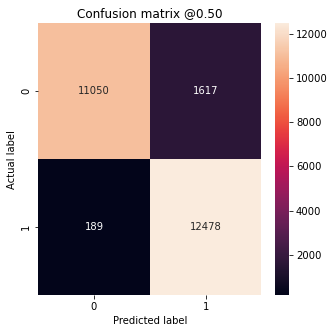

In [17]:
plot_cm(y_test_smt, knn_preds_smt)

# Optimize KNN Model

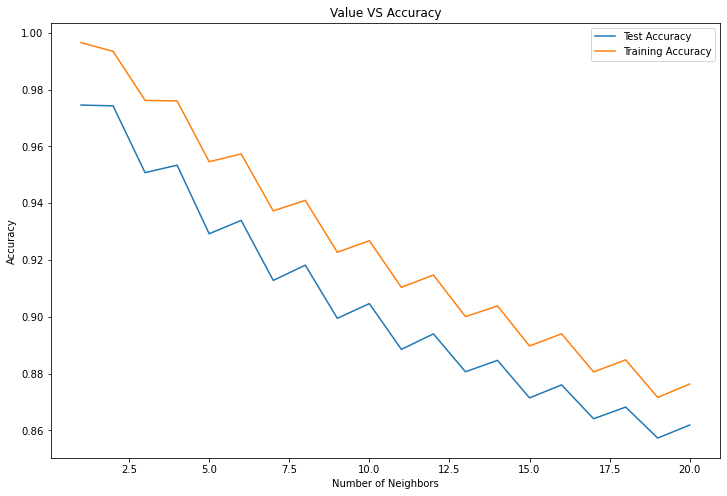

Best accuracy is 0.9745401436804295 with n = 1


In [18]:
# set range of n values
neighbor = range(1, 21)
train_acc = []
test_acc = []

# Loop through different values of n
for i, n in enumerate(neighbor):
    # n from 1 to 20
    knn_model = KNeighborsClassifier(n_neighbors=n)
    
    # Fit with knn
    knn_model.fit(X_train_smt,y_train_smt)
    
    # train accuracy
    train_acc.append(knn_model.score(X_train_smt, y_train_smt))
    
    # test accuracy
    test_acc.append(knn_model.score(X_test_smt, y_test_smt))

# line plot
plt.figure(figsize=[12, 8])
plt.plot(neighbor, test_acc, label = 'Test Accuracy')
plt.plot(neighbor, train_acc, label = 'Training Accuracy')
plt.legend()
plt.title('Value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
#plt.xticks(neig)
#plt.savefig('graph.png')
plt.show()

# print best score
print("Best accuracy is {} with n = {}".format(np.max(test_acc), 1+test_acc.index(np.max(test_acc))))

In [18]:
knn_model_imp = KNeighborsClassifier(n_neighbors=1)
knn_model_imp.fit(X_train_smt, y_train_smt)

knn_preds_smt_imp = knn_model_imp.predict(X_test_smt)
knn_preds_smt_imp = np.round(knn_preds_smt_imp)

#Display the classification report of the model out of prediction using the test data
print(classification_report(y_test_smt, knn_preds_smt_imp))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97     12667
           1       0.96      0.99      0.97     12667

    accuracy                           0.97     25334
   macro avg       0.97      0.97      0.97     25334
weighted avg       0.97      0.97      0.97     25334



Correct Non-injury predictions (True Negatives):  12161
Incorrect Non-injury predictions (False Positives):  506
Correct injury predictions (False Negatives):  164
Incorrect injury predictions (True Positives):  12503
Total injury predictions:  12667


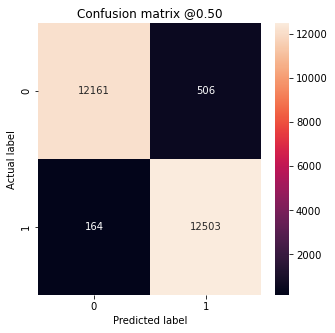

In [19]:
plot_cm(y_test_smt, knn_preds_smt_imp)

# Saving Model

In [20]:
import pickle
file_name = "knn_model_week.pkl"

# save
pickle.dump(knn_model_imp, open(file_name, "wb"))